In [1]:
####### os, pickle
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

from funciones import* 
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [2]:
from main import *

X_cat: (5111, 6383) y_cat: (5111,)
X: (51646, 10055) y: (51646,)
X_redux: (51646, 65) y_redux: (51646,)


In [17]:
#X_balanceado.head()
X_cat.head()

,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación","Rubro1_Equipamiento para el acondicionamiento, distribución y filtrado de fluidos",Rubro1_Equipamiento para laboratorios,...,nombre_producto_Ángulos de plástico,nombre_producto_Árbol de medios,nombre_producto_Árboles,nombre_producto_Árnica,nombre_producto_Émbolo buzo de desagüe o inodoro,nombre_producto_Éter,nombre_producto_Órtesis ortopédicas espinales,nombre_producto_Óxido de calcio,nombre_producto_Útiles de colocación de compuestos,nombre_producto_Útiles de colocación de hidróxido de calcio
id_producto,,,,,,,,,,,,,,,,,,,,,
2792-88-LE21-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704-52-LP21-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003-20-L121-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903556-3-LP21-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4236-21-L121-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Counter(y_cat)
#Counter(y_balanceado_redux)

Counter({0: 4525, 1: 586})

## Entrenamiento con variables categoricas Mercado Publico (sólo dummies)

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [23]:
clf = LogisticRegression(
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1) # la forma del GD
clf = clf.fit(X_train_smote, y_train_smote)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.8s finished


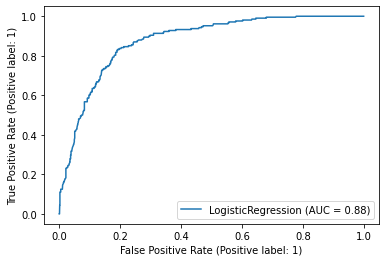

Train AUC 0.9259745628754164
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3046
           1       0.87      0.07      0.13       378

    accuracy                           0.90      3424
   macro avg       0.88      0.54      0.54      3424
weighted avg       0.89      0.90      0.86      3424



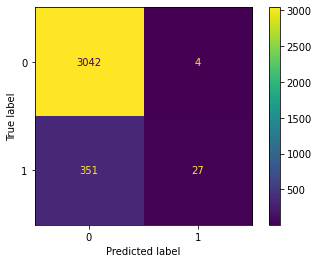

Test AUC 0.8772673193946013
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1479
           1       0.87      0.10      0.17       208

    accuracy                           0.89      1687
   macro avg       0.88      0.55      0.56      1687
weighted avg       0.88      0.89      0.84      1687



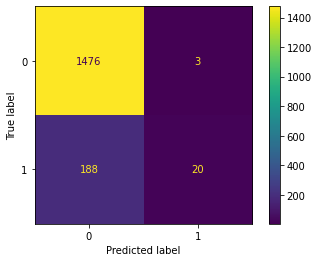

In [24]:
x07 = metrics(clf, X_train, X_test, y_train, y_test, thr=0.5)
x07

In [46]:
os.chdir(r'Modelos')
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')

In [47]:
fh = open('m_reglog_cat.pkl','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(clf,fh)
fh.close()

## Ahora entrenamos el modelo con variables creadas a partir del campo DESCRIPCION y solo variable categorica Rubro 1

In [3]:
X.shape

(51646, 10055)

In [4]:
y.shape

(51646,)

In [5]:
logreg = LogisticRegression()
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
''' parametros definidos anteriormente   
    solver='lbfgs', 
    penalty='l2',
    multi_class='ovr',
    max_iter=500,
    C= 0.1,
    n_jobs=-1,
    verbose=1'''

params = {
    'C': [1.00,0.05], #valores que tomará la Inverse of regularization strength [1.00,0.05,0.01]
    #'class_weight': None,
    #'dual': False,
    #'fit_intercept': True,
    #'intercept_scaling': 1,
    #'l1_ratio': None,
    'max_iter': [500], #Maximum number of iterations taken for the solvers to converge.
    'multi_class': ['ovr'], #‘ovr’, then a binary problem is fit for each label
    #'n_jobs': None,  # lo definiremos en el gridsearch
    'penalty': ['l2']
    #'random_state': None, # lo aplicaremos en el gridsearch
    #'solver': 'lbfgs',  # usamos el que viene por default, ‘liblinear’ is limited to one-versus-rest schemes
    #'tol': 0.0001, #dejamos por defecto el criterio de tolerancia para detener la iteracion
    #'verbose': 0 #dejamos valor por defecto
    #'warm_start': False
    }


In [26]:
scoring = ['roc_auc']
grid_solver = GridSearchCV(estimator = logreg, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 3,  #aplica cross validation utilizando un stratified KFold
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y


In [27]:
model_result_logreg = grid_solver.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [28]:
model_result_logreg.best_params_

{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}

In [29]:
model_result_logreg.cv_results_

{'mean_fit_time': array([144.08115506, 164.2935257 ]),
 'std_fit_time': array([31.58270605,  6.53674108]),
 'mean_score_time': array([7.5431246 , 8.76940028]),
 'std_score_time': array([1.62943634, 1.18339523]),
 'param_C': masked_array(data=[1.0, 0.05],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[500, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_multi_class': masked_array(data=['ovr', 'ovr'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'},
  {'C': 0.05, 'max_iter': 500, 'multi_class': 'ovr', 'penalty': 'l2'}],
 'split0_test_roc_auc': array([0.9810059 , 0.96574493]),
 'split1_test_roc_auc': array([0.

In [32]:
fh = open('m_reglog_PCA','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_logreg,fh)
fh.close()

In [33]:
results_cv=model_result_logreg.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_multi_class,param_penalty,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,144.081155,31.582706,7.543125,1.629436,1.0,500,ovr,l2,"{'C': 1.0, 'max_iter': 500, 'multi_class': 'ov...",0.981006,0.984968,0.985702,0.983892,0.002062,1
1,164.293526,6.536741,8.769400,1.183395,0.05,500,ovr,l2,"{'C': 0.05, 'max_iter': 500, 'multi_class': 'o...",0.965745,0.965520,0.968009,0.966425,0.001124,2


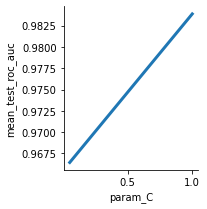

In [34]:
sns.relplot(x="param_C",
            y="mean_test_roc_auc",
            #style="param_max_features",
            #hue="param_min_impurity_decrease",
            kind = "line",
            palette=["r", "b"],
            height=3, linewidth=3, data=results)


In [38]:
type(model_result_logreg.best_estimator_)

sklearn.linear_model._logistic.LogisticRegression

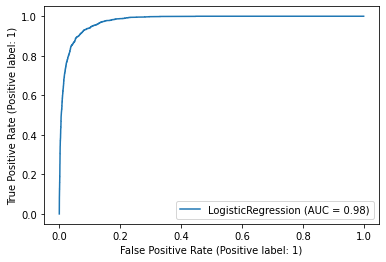

Train AUC 0.9892381270593935
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31010
           1       0.91      0.90      0.91      9303

    accuracy                           0.96     40313
   macro avg       0.94      0.94      0.94     40313
weighted avg       0.96      0.96      0.96     40313



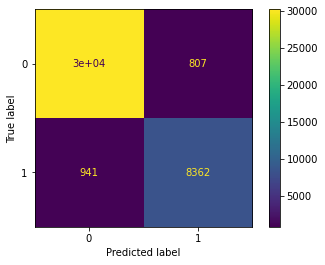

Test AUC 0.9773810380901445
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15260
           1       0.76      0.80      0.78      1784

    accuracy                           0.95     17044
   macro avg       0.87      0.88      0.88     17044
weighted avg       0.95      0.95      0.95     17044



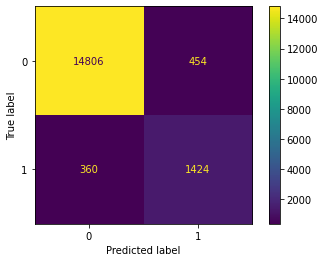

In [39]:
metrics(model_result_logreg.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)